In [28]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing dataset
file = "Appdata1.xlsx"
df=pd.read_excel(file)

# checking columns
print("Columns in Dataset")
print(df.columns)

Columns in Dataset
Index(['Sr. No.', 'Name', 'Founder', 'Rating(Phone)', 'Rating(Tablet)',
       'Rating(TV)', 'Rating(Watch)', 'Rating(Chromebook)', 'Main Category',
       'Review(Phone)', 'Review(Tablet)', 'Review(Watch)', 'Review(TV)',
       'Review(Chromebook)', 'Type', 'Downloaders', 'Science', 'Vocabulary',
       'Mathematics', 'English', 'Computer-Science', 'Competitive Exams',
       'Social-Science', 'Language ', 'Commerce', 'Law', 'CBSE Syllabus',
       'NCERT', 'Astronomy', 'Productivity', 'Art and Craft'],
      dtype='object')


In [29]:
# Sets pandas to display all columns in a DataFrame
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)

# data description
print("Data Description")
print(df.describe())

Data Description
          Sr. No.  Rating(Phone)  Rating(Tablet)  Rating(TV)  Rating(Watch)  \
count  201.000000     201.000000      195.000000   32.000000      21.000000   
mean   101.000000       4.334328        4.338462    4.353125       4.309524   
std     58.167861       0.360369        0.418278    0.434767       0.467873   
min      1.000000       1.700000        2.000000    3.000000       3.200000   
25%     51.000000       4.200000        4.200000    4.200000       4.100000   
50%    101.000000       4.400000        4.400000    4.400000       4.400000   
75%    151.000000       4.600000        4.600000    4.600000       4.600000   
max    201.000000       4.900000        4.900000    5.000000       5.000000   

       Rating(Chromebook)  Review(Phone)  Review(Tablet)  Review(Watch)  \
count          142.000000   2.010000e+02      195.000000      19.000000   
mean             5.433803   3.531921e+05    23643.061538     327.210526   
std             13.577353   1.392710e+06    86

In [30]:
# shape of dataset
print("Shape of dataset")

print(df.shape)

Shape of dataset
(201, 31)


In [31]:
# Type-conversion
df['Review(Phone)']=pd.to_numeric(df['Review(Phone)'])
df['Review(Tablet)']=pd.to_numeric(df['Review(Tablet)'])
df['Review(Watch)']=pd.to_numeric(df['Review(Watch)'])
df['Review(TV)']=pd.to_numeric(df['Review(TV)'])
df['Review(Chromebook)']=pd.to_numeric(df['Review(Chromebook)'])
df['Rating(Phone)']=pd.to_numeric(df['Rating(Phone)'])
df['Rating(TV)']=pd.to_numeric(df['Rating(TV)'])
df['Rating(Chromebook)']=pd.to_numeric(df['Rating(Chromebook)'])
df['Rating(Watch)']=pd.to_numeric(df['Rating(Watch)'])
df['Downloaders']=pd.to_numeric(df['Downloaders'])

In [32]:
# priting dataset
print(df)

# filling nan values
df['Founder'] = df['Founder'].fillna('Unknown')
df[['Rating(Phone)','Rating(Tablet)','Rating(TV)','Rating(Watch)','Rating(Chromebook)','Review(Phone)','Review(Tablet)','Review(Watch)','Review(TV)','Review(Chromebook)','Downloaders']] = df[['Rating(Phone)','Rating(Tablet)','Rating(TV)','Rating(Watch)','Rating(Chromebook)','Review(Phone)','Review(Tablet)','Review(Watch)','Review(TV)','Review(Chromebook)','Downloaders']].fillna(0)
df[['Science','Vocabulary','Mathematics','English','Computer-Science','Competitive Exams','Social-Science','Language ','Commerce','Law','CBSE Syllabus','NCERT','Astronomy','Productivity']] = df[['Science','Vocabulary','Mathematics','English','Computer-Science','Competitive Exams','Social-Science','Language ','Commerce','Law','CBSE Syllabus','NCERT','Astronomy','Productivity']].fillna('N')
df[['Review(Phone)','Review(Tablet)']].replace(',','')
# print(df)

     Sr. No.                           Name  \
0          1                   Khan Academy   
1          2         Udemy - Online Courses   
2          3  edX: Courses by Harvard & MIT   
3          4                          toppr   
4          5                          BYJUS   
..       ...                            ...   
196      197                       TestWale   
197      198                    Learn Swift   
198      199               Skysafari legacy   
199      200    SkyWiki- World of astronomy   
200      201                     Galaxy Map   

                                     Founder  Rating(Phone)  Rating(Tablet)  \
0                                   Sal Khan            4.6             4.4   
1    Eren Bali,Gagan Biyani and Octay Caglar            4.3             4.6   
2                              Anant Agarwal            4.6             4.7   
3                             Zishaan Hayath            4.3             4.2   
4                            Byju Raveen

,Review(Phone),Review(Tablet)
0,147000,15000.0
1,402000,24800.0
2,96600,5890.0
3,182000,8800.0
4,1740000,84100.0
...,...,...
196,1000,7.0
197,464,15.0
198,35800,1870.0
199,686,42.0


In [33]:
# Feature Engineering
def total_review(df):
    return df['Review(Phone)'] + df['Review(Tablet)'] + df['Review(Watch)'] + df['Review(TV)'] + df['Review(Chromebook)']
def avg_rating(df):
    return np.mean(df['Rating(Phone)'] + df['Rating(Tablet)'] + df['Rating(Watch)'] + df['Rating(TV)'] + df['Rating(Chromebook)'])/5
def total_subject(df):
    return df[['Science','Vocabulary','Mathematics','English','Computer-Science','Competitive Exams','Social-Science','Language ','Commerce','Law','CBSE Syllabus','NCERT','Astronomy','Productivity']].eq('Y').sum()

df['Total Review'] = df.apply(total_review, axis=1)
df['Average Rating']=(df.apply(avg_rating,axis=1))
df['Total Subjects']=df.apply(total_subject,axis=1)
print("Total Review\n",df['Total Review'])
print("Average Rating\n",df['Average Rating'])
print("Total Subjects\n",df['Total Subjects'])

Total Review
 0       162477.0
1       427298.0
2       102579.0
3       190821.0
4      1824117.0
         ...    
196       1007.0
197        488.0
198      37715.0
199        728.0
200       5339.0
Name: Total Review, Length: 201, dtype: float64
Average Rating
 0      2.56
1      3.56
2      2.78
3      2.42
4      3.34
       ... 
196    1.76
197    2.56
198    2.64
199    1.74
200    2.60
Name: Average Rating, Length: 201, dtype: float64
Total Subjects
 0      10
1       7
2      10
3       7
4       9
       ..
196     1
197     1
198     1
199     1
200     1
Name: Total Subjects, Length: 201, dtype: int64


In [34]:
# Queries
# Query 1 apps have high downloaders than 10M
print("Name of Apps which have high downloaders than 10M")
print(df[df['Downloaders']>1000000][['Name','Downloaders']])

Name of Apps which have high downloaders than 10M
                               Name  Downloaders
0                      Khan Academy     10000000
1            Udemy - Online Courses     10000000
2     edX: Courses by Harvard & MIT      5000000
3                             toppr     10000000
4                             BYJUS    100000000
..                              ...          ...
180           AnkiDroid Flasshcards     10000000
182  iTranslate Language translator     50000000
184  Beelinguapp language audiobook      5000000
185   Embibe: Learning outcomes app      5000000
189        Oliveboard:Exam prep app      5000000

[97 rows x 2 columns]


In [35]:

# Query 2 Sorting data
df.sort_values(by='Downloaders',ascending=False,inplace=True)
print("Data set\n",df)

Data set
      Sr. No.                             Name                        Founder  \
20        21                             ZOOM                      Eric Yuan   
141      142         ZuAI:Help with homework   Arpit Jain and Anubhav Mishra   
140      141         WordList Visual learning                        Unknown   
18        19                         Duolingo                   Luis von Ahn   
81        82        Evernote -Notes Organizer                Stepan Pachikov   
..       ...                              ...                            ...   
197      198                      Learn Swift                  Chris Lattner   
106      107  Learn Front End Web Development                        Unknown   
146      147                 Teach Me Surgery          TeachMeSeries Limited   
170      171                     Cosmic Watch                  Markus Humbel   
194      195    Topperlearning :Exam Prep App                  Sunil Khanna    

     Rating(Phone)  Rating(Ta

In [36]:
# # Query 3  Apps which teaches 1 subjects
print("Name of Apps which teaches 1 subjects")
print(df[df['Total Subjects']<2][['Name','Downloaders']])

Name of Apps which teaches 1 subjects
                                Name  Downloaders
20                              ZOOM   1000000000
81         Evernote -Notes Organizer    100000000
55                         Photomath    100000000
19                  Google Classroom    100000000
73      Hello english :learn english     50000000
..                               ...          ...
197                      Learn Swift        50000
106  Learn Front End Web Development        10000
146                 Teach Me Surgery        10000
170                     Cosmic Watch        10000
194    Topperlearning :Exam Prep App         1000

[100 rows x 2 columns]


In [37]:
# Query 4 Apps which teaches more than 10 subjects
print("Apps which teaches more than 10 subjects")
print(df[df['Total Subjects'] >10][['Name','Downloaders']])

Apps which teaches more than 10 subjects
                               Name  Downloaders
151  Wattpad-Read and write Stories    100000000
148   Amazon Kindle-Ebooks and more    100000000
145                         Chatgpt     10000000
152    eBooX:ePub pdf e-book reader      5000000


In [38]:
# Query 5 Apps which help students to prepare competitive exams
print("Apps which help students to prepare competitive exams")
print(df[df['Competitive Exams']=='Y' ][['Name','Downloaders']])

Apps which help students to prepare competitive exams
                                 Name  Downloaders
4                               BYJUS    100000000
151    Wattpad-Read and write Stories    100000000
148     Amazon Kindle-Ebooks and more    100000000
16                           Doubtnut     50000000
5                           Unacademy     50000000
0                        Khan Academy     10000000
145                           Chatgpt     10000000
13                            Vedantu     10000000
45          PW-JEE/NEET,UPSC,GATE,SSC     10000000
47          Aakash App for JEE & NEET     10000000
8                            Testbook     10000000
50      Adda 247:Govt Job prep & more     10000000
51     Exam Preparation :Live classes     10000000
3                               toppr     10000000
185     Embibe: Learning outcomes app      5000000
189          Oliveboard:Exam prep app      5000000
152      eBooX:ePub pdf e-book reader      5000000
117                StudyIQ E

In [39]:
# # Query 6 Apps which teach Science subject
print("Apps which teach Science subject")
print(df[df['Science'] =='Y'][['Name','Average Rating']])

Apps which teach Science subject
                               Name  Average Rating
141        ZuAI:Help with homework             1.84
4                             BYJUS            3.34
151  Wattpad-Read and write Stories            4.34
148   Amazon Kindle-Ebooks and more            4.34
16                         Doubtnut            2.46
5                         Unacademy            2.48
6                         Oda Class            2.68
64                     ABCmouse.com            2.32
0                      Khan Academy            2.56
145                         Chatgpt            2.72
126                             TED            4.28
44                        Teachmint            2.48
39               Socratic By Google            2.58
14                         Coursera            3.76
13                          Vedantu            2.54
45        PW-JEE/NEET,UPSC,GATE,SSC            3.66
47        Aakash App for JEE & NEET            1.60
50    Adda 247:Govt Job prep & 

In [40]:
# Query 7 Subjects teaches by Apps
print("Subjects teaches by those apps which teaches Science subject")
print(df[df['Science'] =='Y'][['Name','Total Subjects']])

Subjects teaches by those apps which teaches Science subject
                               Name  Total Subjects
141        ZuAI:Help with homework                4
4                             BYJUS               9
151  Wattpad-Read and write Stories              11
148   Amazon Kindle-Ebooks and more              13
16                         Doubtnut               5
5                         Unacademy               8
6                         Oda Class               5
64                     ABCmouse.com               4
0                      Khan Academy              10
145                         Chatgpt              12
126                             TED               4
44                        Teachmint               6
39               Socratic By Google               2
14                         Coursera               5
13                          Vedantu               9
45        PW-JEE/NEET,UPSC,GATE,SSC               3
47        Aakash App for JEE & NEET               4
50 

In [41]:
# Query  8 Apps which has average rating more than 4.0
print("Name of Apps which has average rating more than 4.0")
print(df[df['Average Rating'] > 4.0][['Name','Average Rating']])

Name of Apps which has average rating more than 4.0
                               Name  Average Rating
18                         Duolingo            4.54
81        Evernote -Notes Organizer            4.04
151  Wattpad-Read and write Stories            4.34
148   Amazon Kindle-Ebooks and more            4.34
57                        Wikipedia            4.56
63         Busuu:learning languages            4.54
65   Quizlet: AI-powered flashcards            4.18
180           AnkiDroid Flasshcards            4.52
126                             TED            4.28
123  Rosetta Stone: Learn Languages            4.64
59                          Mathway            4.26
97       EWA Learn English Language           36.82


In [42]:
# Query 9 Apps which has total review more than 10000
print("Apps which has total review more than 10000")
print(df[df['Total Review'] > 10000][['Name']])

Apps which has total review more than 10000
                              Name
20                            ZOOM
18                        Duolingo
81       Evernote -Notes Organizer
55                       Photomath
4                            BYJUS
..                             ...
103  Drops: Learn American English
142        Answer.AI-your AI tutor
100           Drops : Learn Arabic
52        Science Sangrah -Anu sir
138           Ling Learn languages

[151 rows x 1 columns]


In [43]:
# Query 10 app avialble on all devices
print("Name of Apps which are available on all devices")
print(df[ (df['Review(Phone)'] > 0) & (df['Review(TV)'] > 0) & (df['Review(Chromebook)'] > 0) & (df['Review(Watch)'] > 0)] [['Name']])



Name of Apps which are available on all devices
                               Name
18                         Duolingo
81        Evernote -Notes Organizer
151  Wattpad-Read and write Stories
148   Amazon Kindle-Ebooks and more
57                        Wikipedia
63         Busuu:learning languages
65   Quizlet: AI-powered flashcards
180           AnkiDroid Flasshcards
126                             TED
123  Rosetta Stone: Learn Languages
59                          Mathway


In [44]:
# Query 11 Apps which teach Computer-Science subject
print("Apps which teach Computer-Science subject")
print(df[df['Computer-Science']=='Y'][['Name','Average Rating']])

Apps which teach Computer-Science subject
                                           Name  Average Rating
4                                         BYJUS            3.34
151              Wattpad-Read and write Stories            4.34
148               Amazon Kindle-Ebooks and more            4.34
74                  Reverso Translate and learn            2.80
0                                  Khan Academy            2.56
145                                     Chatgpt            2.72
180                       AnkiDroid Flasshcards            4.52
126                                         TED            4.28
1                        Udemy - Online Courses            3.56
44                                    Teachmint            2.48
21                                         Mimo            2.78
14                                     Coursera            3.76
13                                      Vedantu            2.54
10                                        Entri            1.8

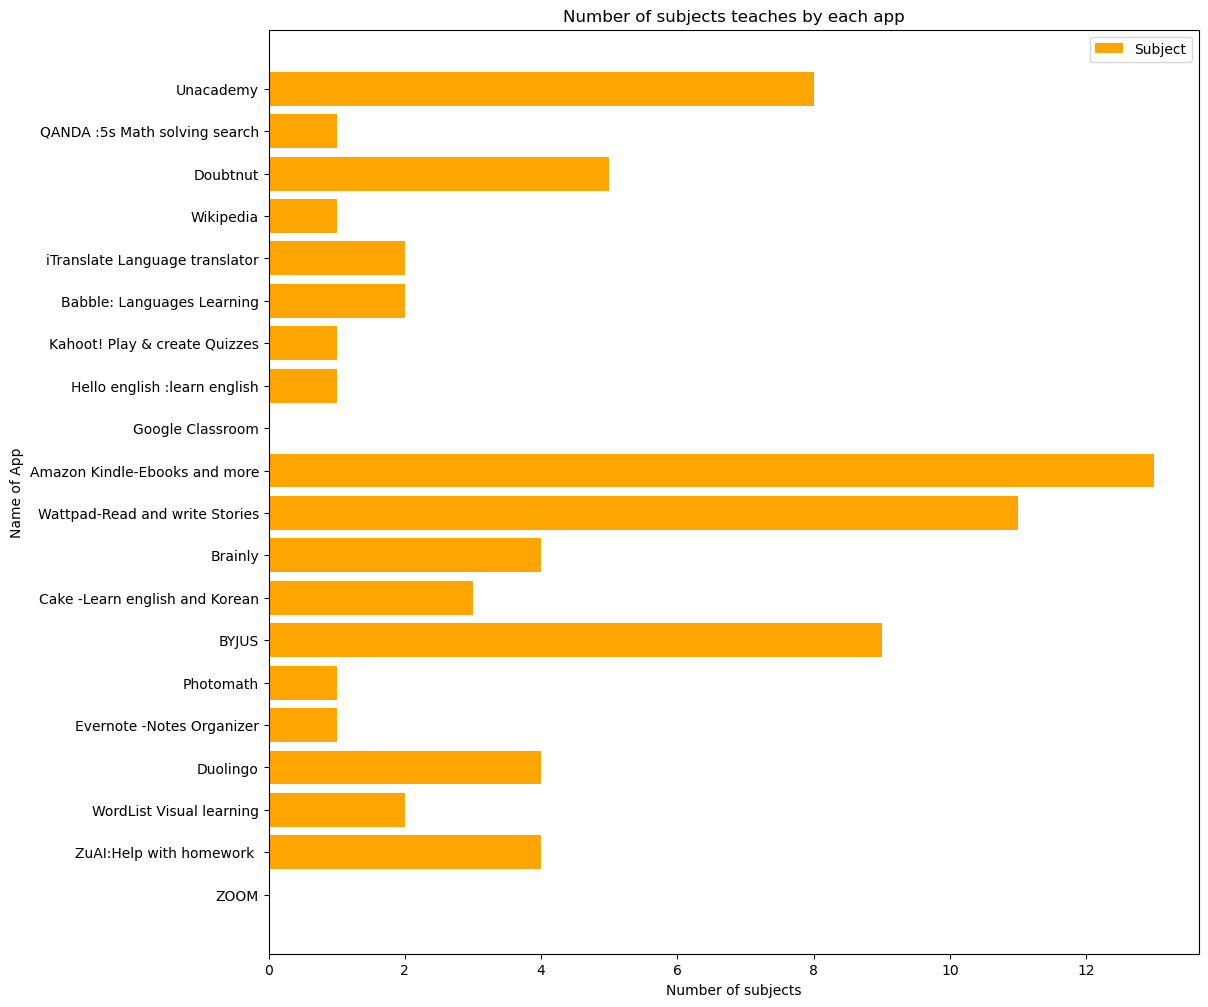

In [45]:
# 1 graph
# Show number of subject teaches by first 20 App
plt.figure(figsize=(12,12))
m=df['Name'].head(20)
n=df['Total Subjects'].head(20)
plt.barh(m,n,color='orange',label='Subject')
plt.legend()
plt.title("Number of subjects teaches by each app")
plt.xlabel('Number of subjects')
plt.ylabel('Name of App')
plt.show()


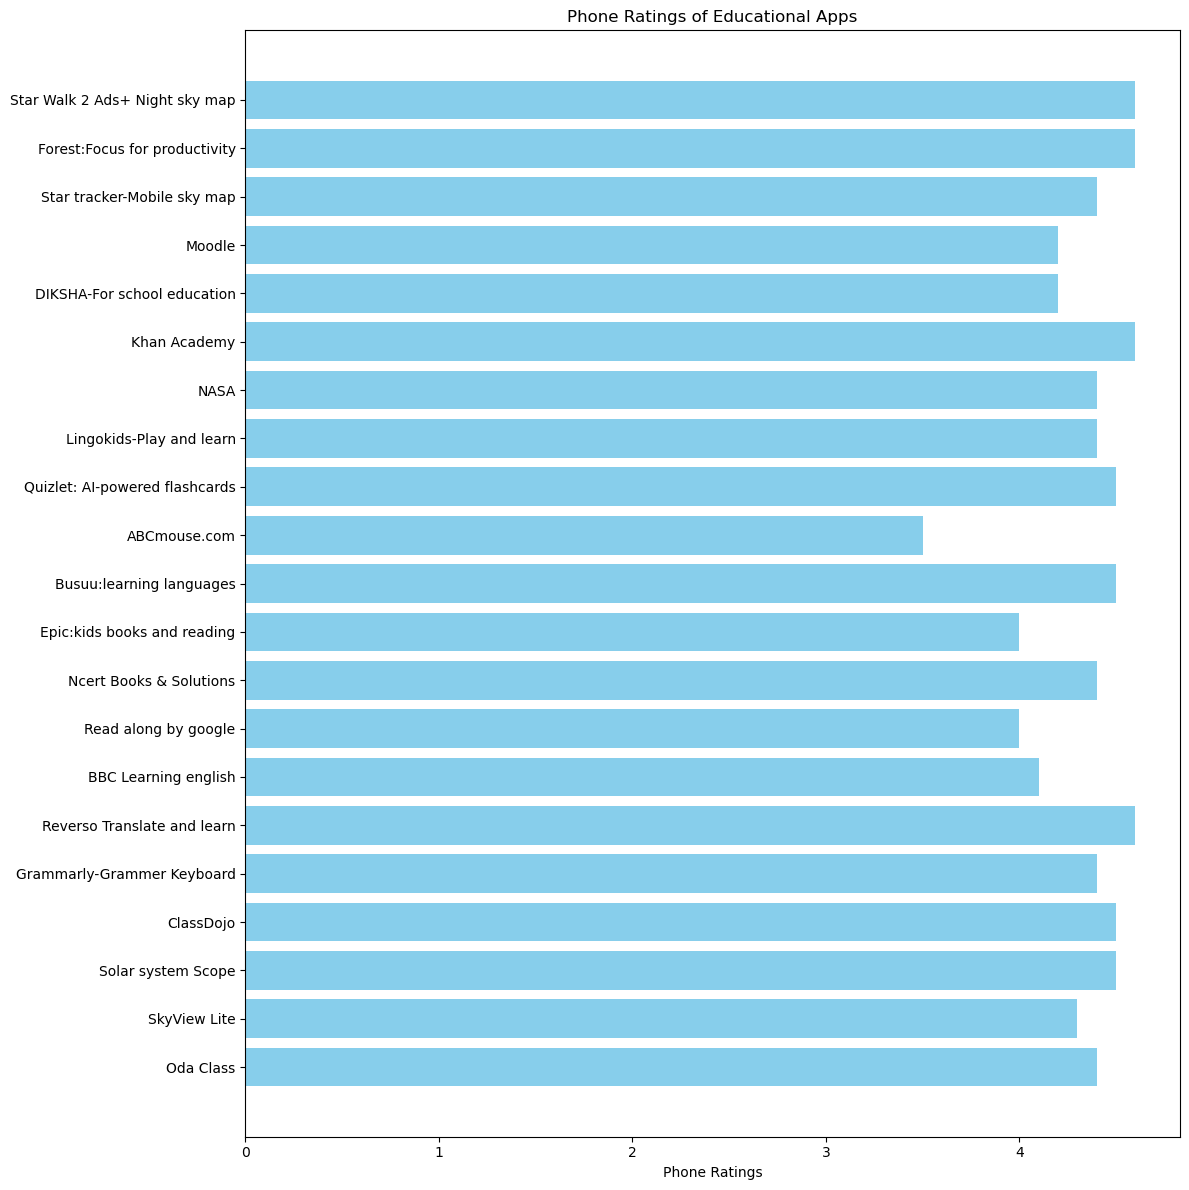

In [46]:
# 2 graph analysing the rating of app on phone with horizontal graph
phone_ratings = df['Rating(Phone)']
app_names = df['Name']
plt.figure(figsize=(12, 12))
plt.barh(app_names[20:41], phone_ratings[20:41], color='skyblue')
plt.xlabel('Phone Ratings')
plt.title('Phone Ratings of Educational Apps')
plt.tight_layout()
plt.show()

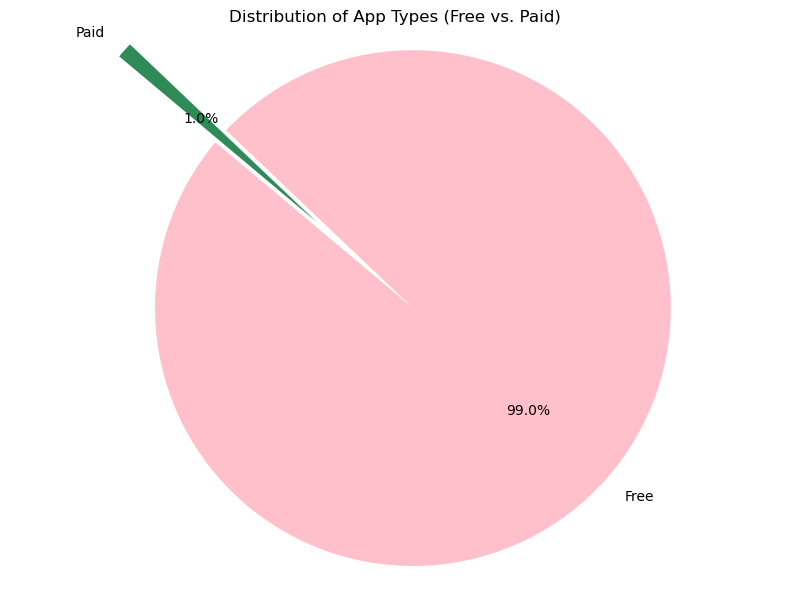

In [47]:
# 3 graph : Visualizing the type of each app.
app_type_counts = df['Type'].value_counts()
# print(app_type_counts)
# Plotting a pie chart for app types
plt.figure(figsize=(8, 6))
labels = ['Free', 'Paid']  # Labels for each portion
explode = (0, 0.5)
colors=['pink','seagreen']
# Creating the pie chart
plt.pie(app_type_counts,explode=explode,colors=colors, labels=labels, autopct='%1.1f%%', startangle=140)
# Adding title
plt.title('Distribution of App Types (Free vs. Paid)')
# Displaying the pie chart
plt.axis('equal')
plt.tight_layout()
plt.show()


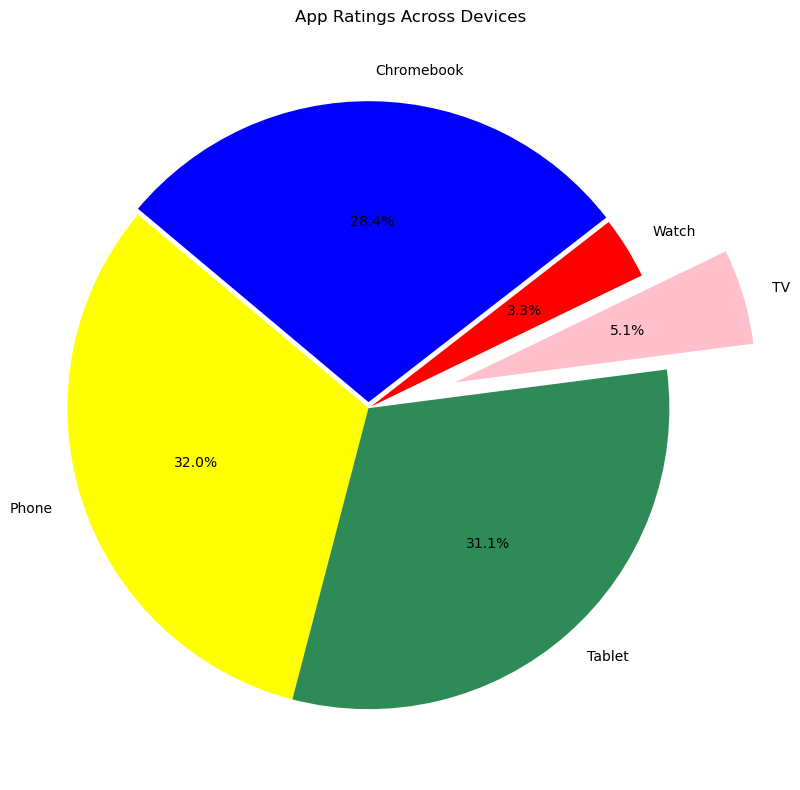

In [48]:
# 4 graph Visualizing rating gives by users from different devices.
rating_columns = ['Rating(Phone)', 'Rating(Tablet)', 'Rating(TV)', 'Rating(Watch)', 'Rating(Chromebook)']
# Extracting ratings from the dataset
ratings = df[rating_columns].mean()
# Plotting a pie chart for app ratings across devices
plt.figure(figsize=(8, 8))
explode=[0,0,00.3,0.01,0.02]
colors=['Yellow','seagreen','pink','red','blue']
label=['Phone','Tablet','TV','Watch','Chromebook']
# Creating the pie chart
plt.pie(ratings,explode=explode,colors=colors,labels=label, autopct='%1.1f%%',startangle=140)
# Adding title
plt.title('App Ratings Across Devices')
# Displaying the pie chart
plt.axis('equal')
plt.tight_layout()
plt.show()


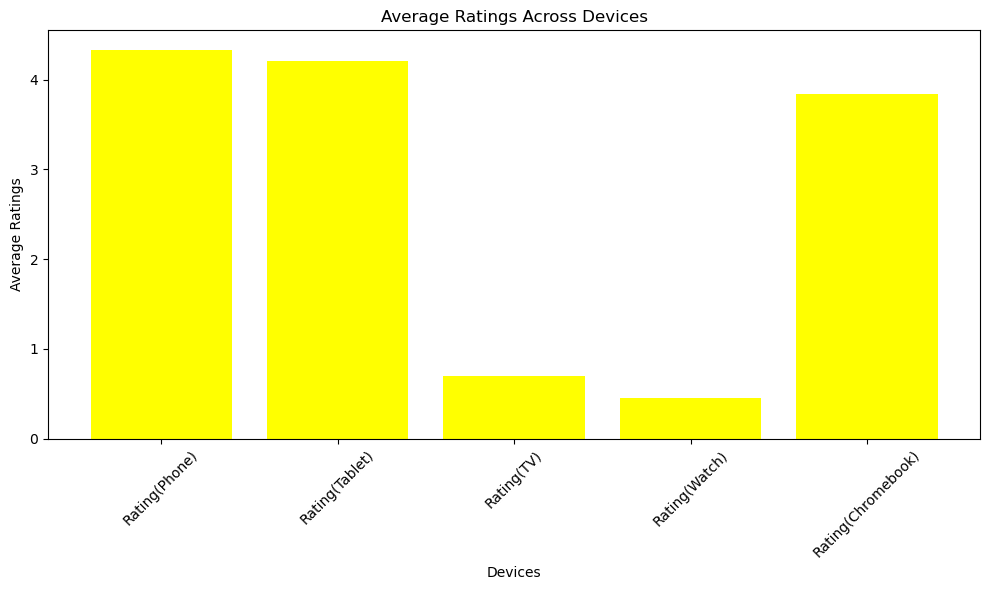

In [49]:
# 5 graph
# Plotting a bar plot for average ratings across devices
rating_columns = ['Rating(Phone)', 'Rating(Tablet)', 'Rating(TV)', 'Rating(Watch)', 'Rating(Chromebook)']
ratings = df[rating_columns].mean()
# Plotting a bar plot for average ratings across devices
plt.figure(figsize=(10, 6))
devices = ratings.index #['Rating(Phone)', 'Rating(Tablet)', 'Rating(TV)', 'Rating(Watch)', 'Rating(Chromebook)']
avg_ratings = ratings.values #mean values
plt.bar(devices, avg_ratings, color='yellow')
plt.title('Average Ratings Across Devices')
plt.xlabel('Devices')
plt.ylabel('Average Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



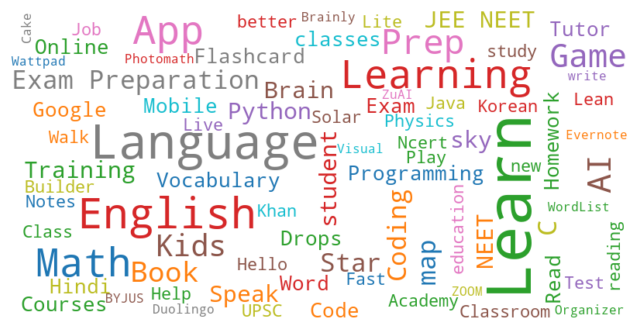

In [50]:
# worldcloud of apps
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',colormap='tab10',width=800, height=400)
text=df['Name'].str.cat(sep=' ')
wordcloud.max_font_size = 80
wordcloud.max_words = 80
wordcloud.min_font_size=10
wordcloud.generate(text)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()




In [51]:
# # EDA
# import numpy as np
# import pandas as pd
# from ydata_profiling import ProfileReport
# file = "Appdata1.xlsx"
# df=pd.read_excel(file)
# profile = ProfileReport(df)
# profile.to_file("eduactional.html")